In [1]:
import soundfile as sf
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
import time
import threading
from copy import deepcopy

import torch
import torch.nn as nn

# 小さい「つ」がカットされてる
# utama5.wav2:11くらい

In [14]:
wavfile = "data/TamaneUta.wav"
data, rate = sf.read(wavfile) # rate == 48000 # samplerate:1秒あたりのフレーム数
print(data.shape, rate)
print(int(len(data)/rate)//60, "分", int(len(data)/rate)%60, "秒")

(134538030, 2) 48000
46 分 42 秒


In [2]:
# def aplay(wavfile):
#     data, rate = sf.read(wavfile) # rate == 48000 # samplerate:1秒あたりのフレーム数
#     _data = data[s:e+1]
#     sf.write('new_file.wav', _data, rate) # ようこそこちらへ
#     subprocess.check_output("./play.sh")
    
# def timer():
#     for i in range(int(s/(rate/10)),int(e/(rate/10))):
#         # 先に出力した内容を上書きする
#         sys.stdout.write("\r%03.1f"%(i*0.1))
#         sys.stdout.flush()
#         time.sleep(0.1)

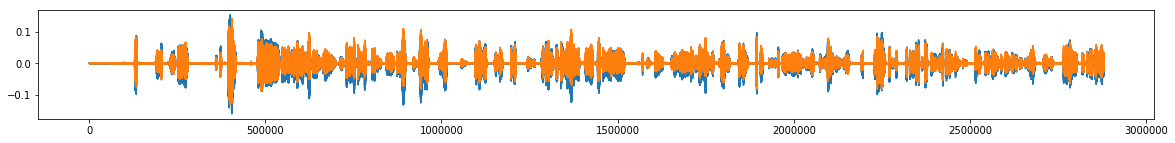

In [15]:
plt.figure(figsize=(20,2))
s = rate*45
e = s + rate * 60
plt.plot(data[s:e])
plt.show()

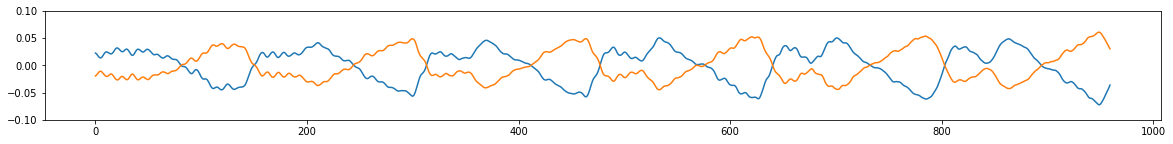

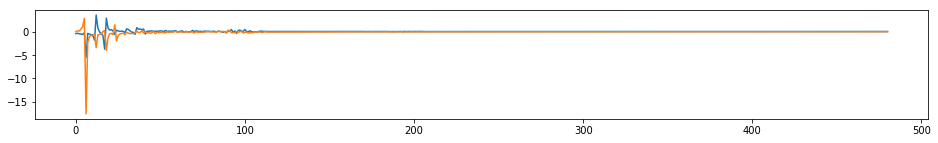

In [102]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])
s = rate*60.20
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

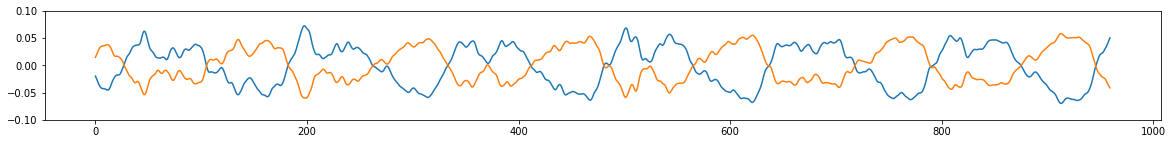

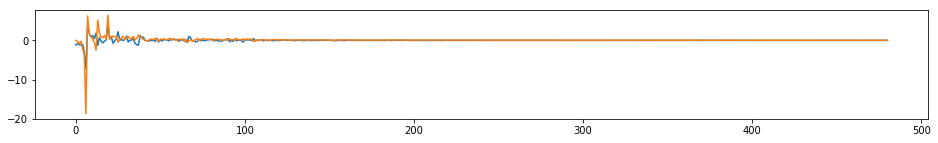

In [103]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*64.55
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

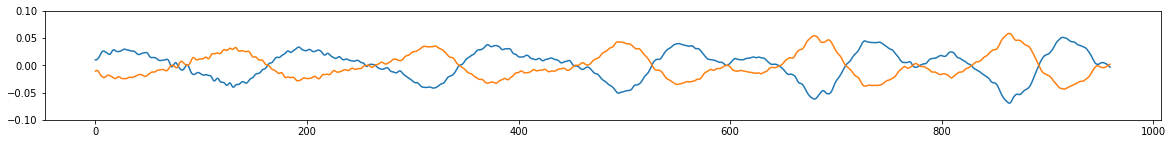

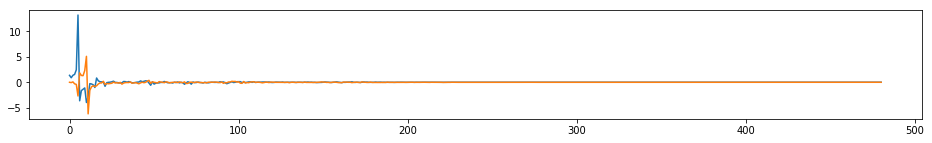

In [104]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*68.05
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

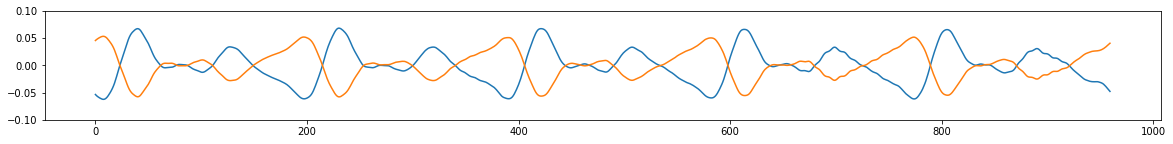

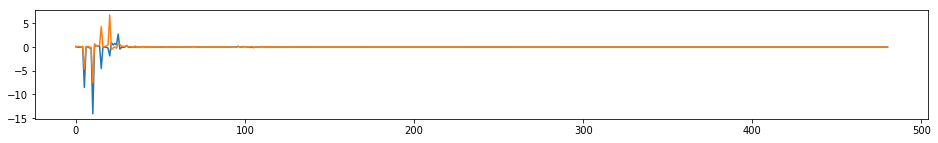

In [105]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*72
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

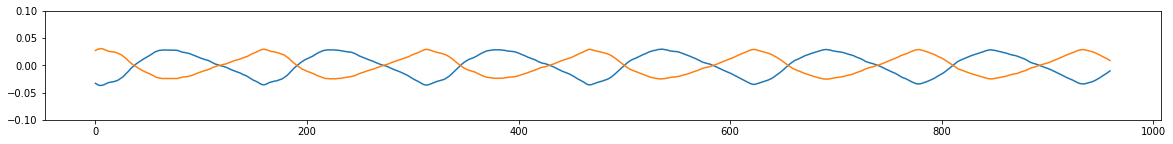

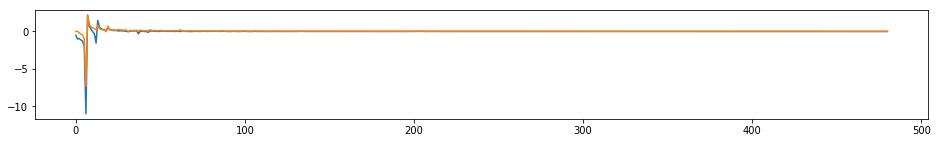

In [108]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*76.05
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

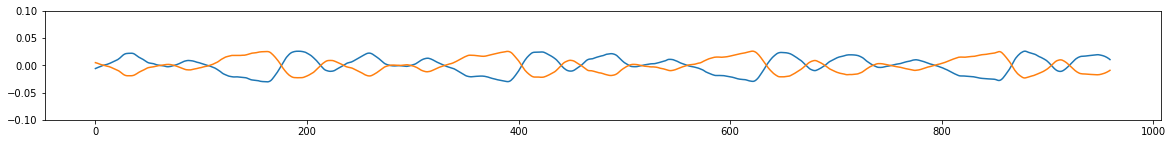

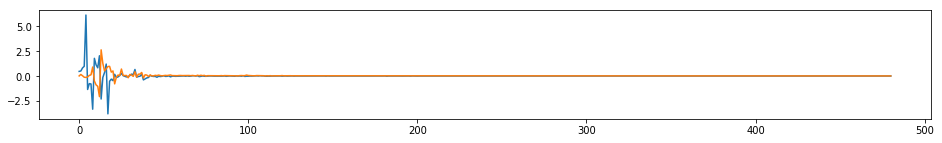

In [109]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*88.97
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

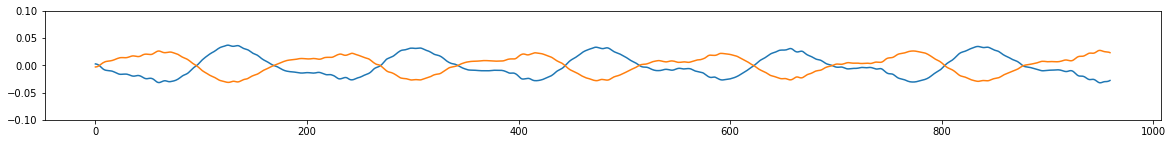

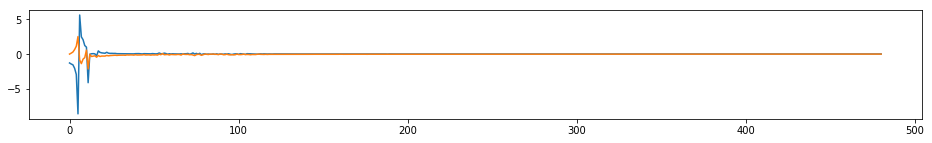

In [110]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*92
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

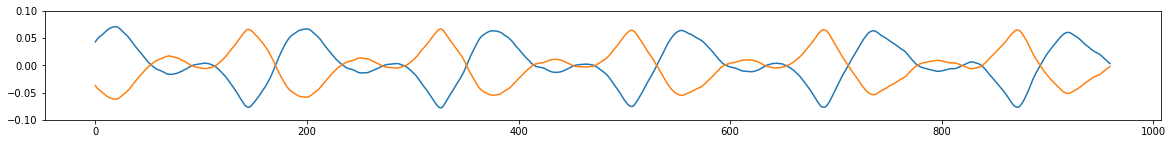

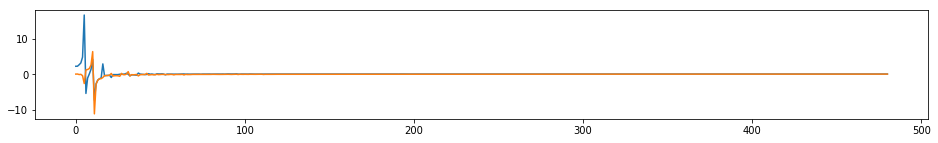

In [121]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*103
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

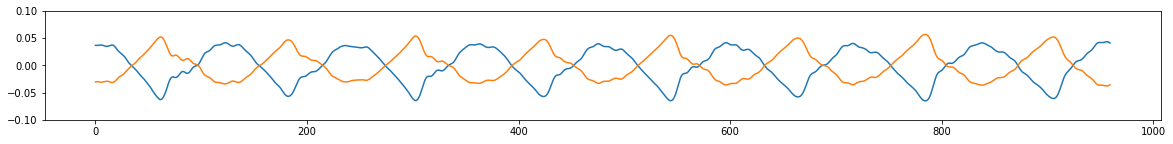

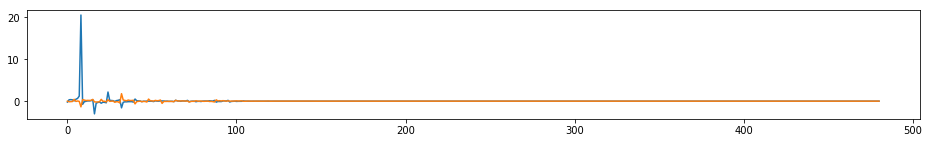

In [132]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*114
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

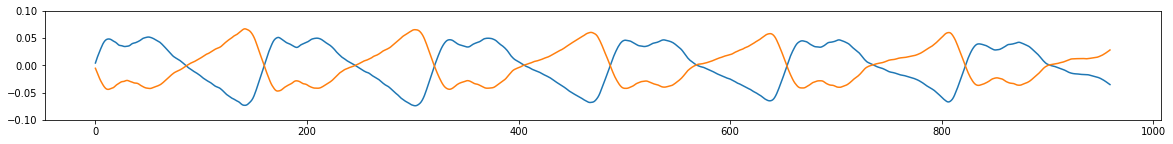

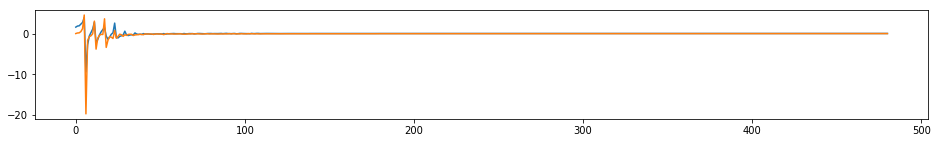

In [133]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*115
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

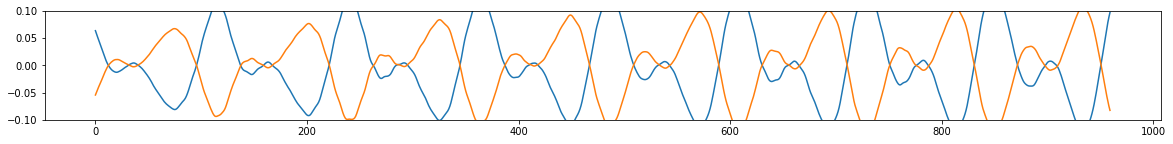

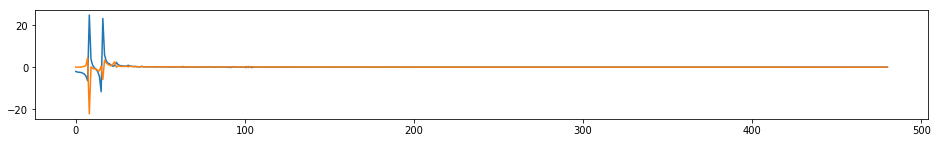

In [139]:
plt.figure(figsize=(20,2))
plt.ylim([-0.1,0.1])

s = rate*121
e = s + rate * 0.02
f = data[int(s):int(e)]
plt.plot(f)
plt.show()
g = my_fft(f[:,0], path)

In [8]:
utama = []

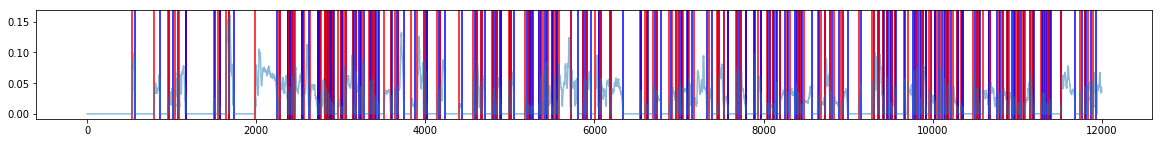

In [9]:

split_i = []
s = rate*45
e = s + rate * 60

X = data[s:e]
X = np.abs(X)
X = X.reshape(1, 1, -1)
X = nn.MaxPool1d(kernel_size=480)(torch.from_numpy(X).double())
X = X.reshape(-1)
X = np.array(X)

X = np.where(X>0.01, X, 0)

combo = 0
combo_s, combo_e = None, None


flag = False

for i, d in enumerate(X):
    if d > 0:
        if combo == 0:##########3
            combo_s = i-1
        combo += 1
    else:
        
        if combo > 0:##########3
            combo_e = i+1
            split_i.append([combo_s, combo_e])
            combo_s, combo_e = None, None            
        combo = 0

plt.figure(figsize=(20,2))

for sx in split_i:
    plt.axvline(sx[0], color="r")
    plt.axvline(sx[1], color="b")
plt.plot(X, alpha=0.5)
plt.show()

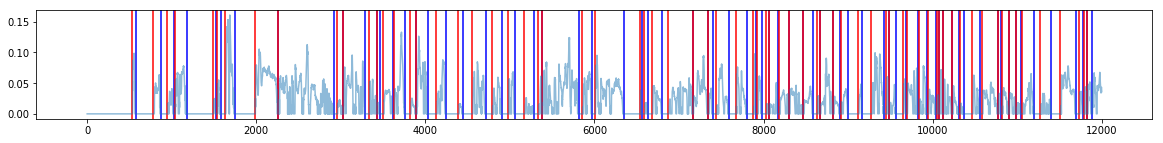

In [10]:
_indices = np.argwhere(X>0.01)
indices = np.zeros(len(X))
indices[_indices] = 1
_indices = deepcopy(indices)
for t in range(10,len(indices)-10):
    if _indices[t] > 0:
        for _t in range(-10, 11):
            indices[t+_t] = 1
            
_indices = deepcopy(indices)
split_i = []
combo = 0

for i, d in enumerate(_indices):
    if d > 0:
        if combo == 0:##########3
            combo_s = i-1
        combo += 1
    else:
        
        if combo > 0:##########3
            combo_e = i+1
            split_i.append([combo_s, combo_e])
            combo_s, combo_e = None, None            
        combo = 0

plt.figure(figsize=(20,2))
for sx in split_i:
    plt.axvline(sx[0], color="r")
    plt.axvline(sx[1], color="b")
plt.plot(X, alpha=0.5)
plt.show()    

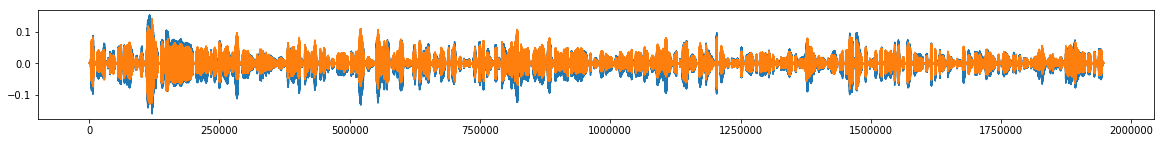

In [11]:
split_i = [[sx[0]*240+s, sx[1]*240+s] for sx in split_i]

X = data
for sx in split_i:
    utama.extend(X[sx[0]:sx[1]])

plt.figure(figsize=(20,2))
plt.plot(utama)
plt.show()

In [12]:
sf.write('new_file.wav', utama, rate)
# subprocess.check_output("./play.sh")

In [13]:
(len(data) - s) / (rate*60)

45.96459375

# 3000万フレームでメモリ6GBくらい持ってかれる

In [6]:
path_i = 0

for j in range(9):
    utama = []
    
    for i in range(5*j, 5*(j+1)):

        split_i = []
        s = rate*45
        s = s + rate * 60 * i
        e = s + rate * 60

        X = data[s:e]
        X = np.abs(X)
        X = X.reshape(1, 1, -1)
        X = nn.MaxPool1d(kernel_size=480)(torch.from_numpy(X).double())
        X = X.reshape(-1)
        X = np.array(X)

        X = np.where(X>0.01, X, 0)

        combo = 0
        combo_s, combo_e = None, None


        flag = False

        for i, d in enumerate(X):
            if d > 0:
                if combo == 0:##########3
                    combo_s = i-1
                combo += 1
            else:

                if combo > 0:##########3
                    combo_e = i+1
                    split_i.append([combo_s, combo_e])
                    combo_s, combo_e = None, None            
                combo = 0

        _indices = np.argwhere(X>0.01)
        indices = np.zeros(len(X))
        indices[_indices] = 1
        _indices = deepcopy(indices)
        for t in range(10,len(indices)-10):
            if _indices[t] > 0:
                for _t in range(-10, 11):
                    indices[t+_t] = 1

        _indices = deepcopy(indices)
        split_i = []
        combo = 0

        for i, d in enumerate(_indices):
            if d > 0:
                if combo == 0:##########3
                    combo_s = i-1
                combo += 1
            else:

                if combo > 0:##########3
                    combo_e = i+1
                    split_i.append([combo_s, combo_e])
                    combo_s, combo_e = None, None            
                combo = 0

        split_i = [[sx[0]*240+s, sx[1]*240+s] for sx in split_i]

        X = data
        for sx in split_i:
            utama.extend(X[sx[0]:sx[1]])
        print(len(utama), end=" ")
        
    print()
    path_i += 1
    path = 'utama' + str(path_i) + '.wav'
    print(path)
    sf.write(path, utama, rate)


1946880 3674160 5906160 8040240 10370160 
utama1.wav
2345040 4578720 6830160 9034320 11241600 
utama2.wav
2430720 4577280 6878640 8902320 10850160 
utama3.wav
2140320 4252560 6261360 8357040 10323120 
utama4.wav
2143680 4495200 6558240 8718240 10845120 
utama5.wav
2032800 4297920 6675840 8904000 11244720 
utama6.wav
2312400 4356240 6410400 8651760 10865280 
utama7.wav
2009760 4052640 6208800 8527200 10389360 
utama8.wav
1906320 3805440 5911920 8023680 10004880 
utama9.wav


utama1.wav
(10370160, 2) 48000
3 分 36 秒


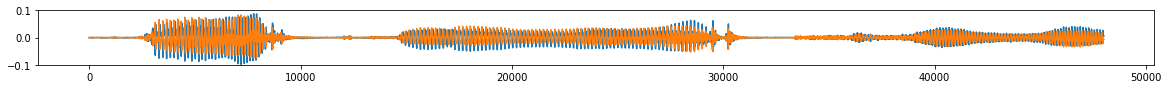

utama2.wav
(11241600, 2) 48000
3 分 54 秒


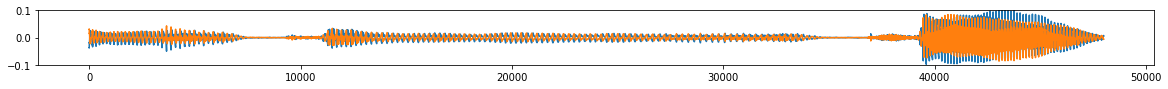

utama3.wav
(10850160, 2) 48000
3 分 46 秒


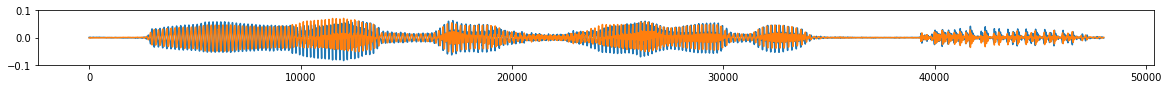

utama4.wav
(10323120, 2) 48000
3 分 35 秒


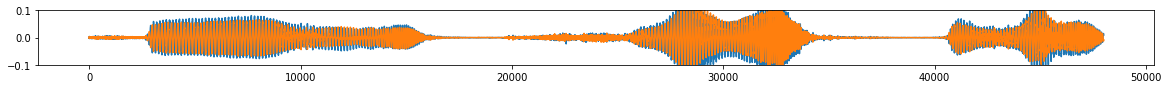

utama5.wav
(10845120, 2) 48000
3 分 45 秒


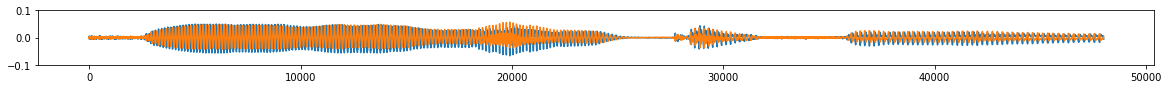

utama6.wav
(11244720, 2) 48000
3 分 54 秒


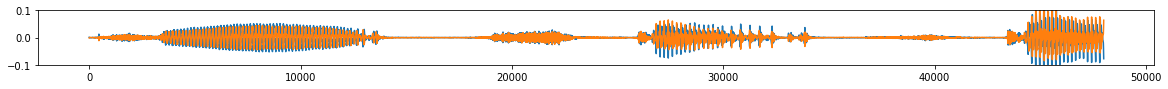

utama7.wav
(10865280, 2) 48000
3 分 46 秒


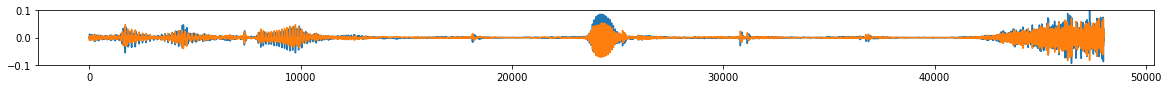

utama8.wav
(10389360, 2) 48000
3 分 36 秒


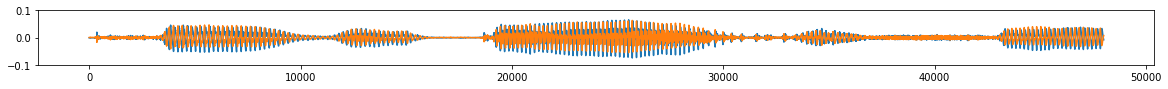

utama9.wav
(10004880, 2) 48000
3 分 28 秒


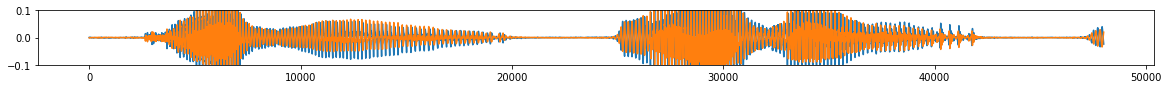

In [11]:
path_i = 0
for j in range(9):
    path_i += 1
    path = 'utama' + str(path_i) + '.wav'
    print(path)
    data, rate = sf.read(path) # rate == 48000 # samplerate:1秒あたりのフレーム数
    
    print(data.shape, rate)
    print(int(len(data)/rate)//60, "分", int(len(data)/rate)%60, "秒")
    
    plt.figure(figsize=(20,1))
    plt.ylim([-0.1,0.1])

    s = 0 #rate * 0.1
    e = s + rate * 1
    plt.plot(data[int(s):int(e)])
    plt.show()

In [ ]:
いろんな声をまとめてエンコードする必要があるのか問題

In [91]:
def my_fft(data, path):
    f = data

    F = np.fft.fft(f)

    F[int(len(F)/2)+1:] = 0+0.j

    X = np.c_[np.real(F)[:int(len(F)/2)+1],np.imag(F)[:int(len(F)/2)+1]]#.copy()
    
    plt.figure(figsize=(16,2))
#     plt.ylim([-100,100])
    plt.plot(X)
    plt.show()
    
    X[int(len(X)/2):] = 0
    
    
    F = np.zeros(len(f), dtype=np.complex)
    F[:len(X)] = np.array([complex(r, i) for [r, i] in X])

    F[-int(len(F)/2):] = np.conj(F[1:int(len(F)/2)+1][::-1])

    g = np.fft.ifft(F)
    g = np.real(g)

    # gallery/g0.wav
#     sf.write("gallery/f" + path[-5:], g, rate)
    
#     X = np.where(abs(X) < 10, 0, X) # 20はだめだめ10もわかる
    
#     plt.figure(figsize=(16,2))
#     plt.plot(X)
#     plt.show()
    
#     F = np.zeros(len(f), dtype=np.complex)
#     F[:len(X)] = np.array([complex(r, i) for [r, i] in X])

#     F[-int(len(F)/2):] = np.conj(F[1:int(len(F)/2)+1][::-1])

#     g = np.fft.ifft(F)
#     g = np.real(g)

#     sf.write(path, g, rate)
    
    return X #g 